#### Continuing the analysis in python 3

In [2]:
# continuing attempts to only plot months which have > 10 obs that month. 

import os
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir("/home/sophie/projects/windspeed/bin/") # change to directory where the module is. Must be a better way?
from group_tseries import read_file

Sud=['62600WadiHalfa','62640AbuHamed','62650Dongola','62660Karima',
'62680Atbara'] 

wind = read_file(Sud[1])

In [3]:
# Adding rows to the wind dataFrame, ready for grouping

wind['ws_0']= wind['ws'][wind['hour'].isin([0])]
wind['ws_06']= wind['ws'][wind['hour'].isin([6])]
wind['ws_12']= wind['ws'][wind['hour'].isin([12])]
wind['ws_18']= wind['ws'][wind['hour'].isin([18])]

In [5]:
group = wind.groupby(['year', 'month'])

def meanf(x):
    if x.count() > 10:
        return x.mean()
    #else:
       # return x[:]==0

def sdf(x):
    if x.count() > 10:
        return x.std()
    #else:
       # return x[:]==0    


wind_group = group['ws','ws_0','ws_06','ws_12','ws_18'].agg([meanf,sdf])

print (wind.groupby(['year', 'month']).count()[0:10])
print (wind_group[0:10])


            date_time  day  hour  ws  ws_0  ws_06  ws_12  ws_18
year month                                                     
1984 10             1    1     1   1     0      1      0      0
     12             4    4     4   4     0      1      3      0
     3             43   43    43  43     0     16     18      9
     4              2    2     2   2     0      1      1      0
     5              1    1     1   1     0      0      0      1
     7              5    5     5   5     0      1      4      0
     8             12   12    12  12     0      4      8      0
1985 1              1    1     1   1     0      1      0      0
     11             4    4     4   4     0      2      1      1
     12            32   32    32  32     0     15     14      3
                  ws            ws_0         ws_06               ws_12  \
               meanf       sdf meanf sdf     meanf       sdf     meanf   
year month                                                               
1984 10   

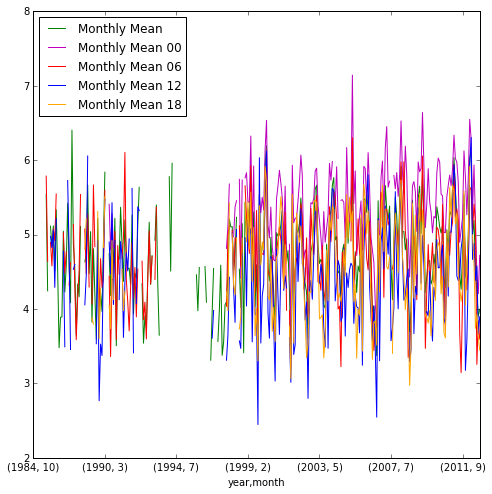

In [8]:
# Make a timeseries of wind-speed where only these values are plotted. 
# Might not be joined-up lines.

wind_group.ws['meanf'].plot(figsize=(8,8), c = 'g',legend=True, label='Monthly Mean')
wind_group.ws_0['meanf'].plot(figsize=(8,8), c = 'm',legend=True, label='Monthly Mean 00')
wind_group.ws_06['meanf'].plot(figsize=(8,8), c = 'r',legend=True, label='Monthly Mean 06')
wind_group.ws_12['meanf'].plot(figsize=(8,8), c = 'b',legend=True, label='Monthly Mean 12')
wind_group.ws_18['meanf'].plot(figsize=(8,8), c = 'orange',legend=True, label='Monthly Mean 18')

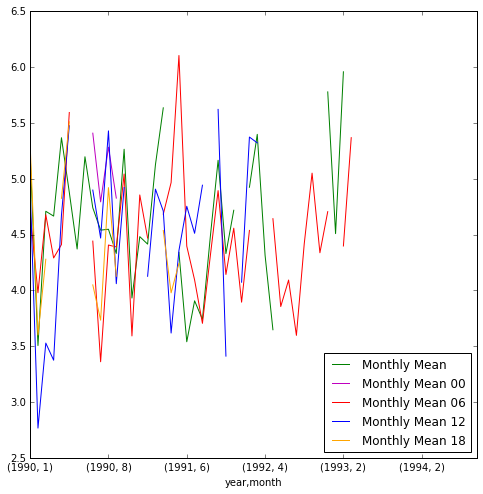

In [13]:
# Taking a subsection

# Can specify months like this
wind_group.ws['meanf']['1990-3':'1994-3'].plot(figsize=(8,8), c = 'g',legend=True, label='Monthly Mean')

# And it still plots out the other
wind_group.ws_0['meanf']['1990':'1994'].plot(figsize=(8,8), c = 'm',legend=True, label='Monthly Mean 00')
wind_group.ws_06['meanf']['1990':'1994'].plot(figsize=(8,8), c = 'r',legend=True, label='Monthly Mean 06')
wind_group.ws_12['meanf']['1990':'1994'].plot(figsize=(8,8), c = 'b',legend=True, label='Monthly Mean 12')
wind_group.ws_18['meanf']['1990':'1994'].plot(figsize=(8,8), c = 'orange',legend=True, label='Monthly Mean 18')


In [59]:
NAl=['60525Biskra','60549Mecheria','60550Elbayadh',
'60555Touggourt','60559ElOued','60566Ghardaia','60580Ouargla',
'60581HassiMessaoud']

CSar=['60607Timimoun','60611InAmenas','60620Adrar','60630InSalah',
'62103Ghadames','62124Sebha']

WSa=['61223Tombouctou','61226Gao','61230NioroDuSahel','61498Kiffa',
'61499AiounElAtrouss','61492Kaedi','61497Nema','61450Tidjika']

CSal=['61024Agadez','61045Goure','61052Niamey','64753Faya',
'61017Bilma'] 

Egy=['62387Minya','62393Asyut','62405Luxor','62414Asswan',
'62420Baharia','62423Farafra','62435Kharga'] 

Sud=['62600WadiHalfa','62640AbuHamed','62650Dongola','62660Karima',
'62680Atbara']


stations=[NAl,CSar,WSa,CSal,Egy,Sud]

group_strings=['NAlgeria','CSahara','WSahel','CSahel', 'Egypt','Sudan']

group_names={'NAlgeria':NAl,'CSahara':CSar,'WSahel':WSa,'CSahel':CSal, 
'Egypt':Egy,'Sudan':Sud}

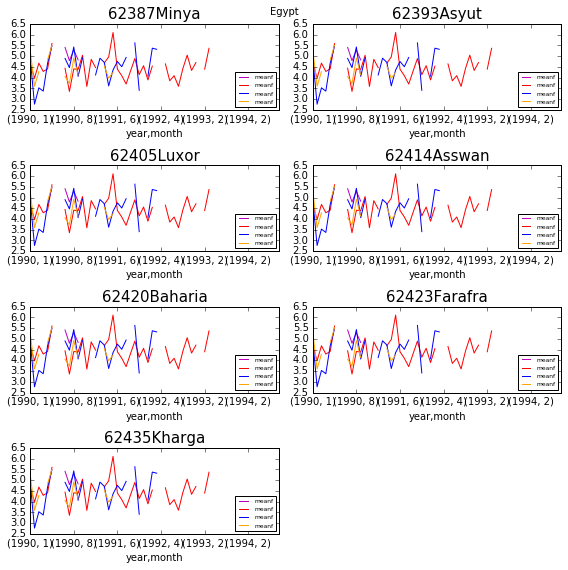

In [61]:
# Where is the looping function which can loop over 

# This will be looped over for x in stations:
b = 4
x = stations[b]

fig = plt.figure(figsize=(5,5))

for i in range(len(x)):

# fig.add_subplot(nrows, ncols, num)

    ax = fig.add_subplot(int((len(x)+1)/2), 2, i+1)

    plt.title(s=x[i], fontsize=15)
    
    wind_group.ws_0['meanf']['1990':'1994'].plot(figsize=(8,8), c = 'm')
    wind_group.ws_06['meanf']['1990':'1994'].plot(figsize=(8,8), c = 'r')
    wind_group.ws_12['meanf']['1990':'1994'].plot(figsize=(8,8), c = 'b')
    wind_group.ws_18['meanf']['1990':'1994'].plot(figsize=(8,8), c = 'orange')
    ax.legend(loc=4,prop={'size':6})
    plt.tight_layout() # very nice! stops the titles overlapping

#ax.set_xticks([]); ax.set_yticks([])

#ax.set_xticks([]); ax.set_yticks([])

fig.suptitle(group_strings[b])

# borderaxespad 	the pad between the axes and legend border
# bbox_to_anchor=(x,y)-->if x > 1 it will be place outside of the last plot
# This is only useful for an odd number of plots
#ax.legend(bbox_to_anchor=(1.05, 0.1), loc='lower left')#, borderaxespad=0.)

#fig.savefig('filename.png', dpi=125)

In [70]:
# read in my functions seperately to try and work out what they are doing
from group_tseries import plot_tseries
